<a href="https://colab.research.google.com/github/anthonymelson/portfolio/blob/master/Penney's_Game_Strategies_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

This notebook was designed to explore Penney's Game in a way that students could understand, and experts could enjoy.  The hope is that it will be valuable for both, despite the fact that some concepts may be difficult for students and many descriptions will be unnecessarily simple for experts.

This ambition was birthed from a combination of interest in the game, and a lack of careful explainations and finished implementations available online.  Hopefully, this will help fill that void.

It covers many aspects of the game: its origin, how it is played, why it is counter-intuitive to many, the math and proper intuitions needed to understand it, optimal strategies, and several solutions for it.

For those who are either well versed in the game, uniterested in an inutitive understanding, or are only interested in the Python implementations of the solutions: **feel free to go strait to the end**.

However, those who are interested in counter-intuitive mathematical results or want to see math from multiple disciplines applied to a strange game, **start at the begining, and enjoy!**

# **1) Background**

![Walter Penney](https://drive.google.com/uc?id=1sDIHbksAFqhbr1YLSy-6d20JRS493Fmc) 

**Walter Penney** 


---



While working at NASA in the 1969, Walter Penney discovered a counter-intuitive result of probability theory and pattern matching.  He introduced this concept in *Problem 95: Penney's Ante* in 1974, with a simple coin flipping game called Penney's Game.

Shortly after, his game was featured in Martin Gardner's *Mathematical Games* column in *Scientific American*--gaining it a great deal of exposure and interest.  Since, his game has consistently challenged the standard expectations and assumptions of lay people and mathematicians alike, and even drawn the attention of mathematical greats like John Conway.

Through this game, he showed, in contradiction to usual assumptions about probabilities, that **specific sequences (say HHT or HHH) are not equally likely to appear first in a series of coin flips**.  Furthermore, that the advantage of various sequences over one another are *intransitive*, meaning that **the dominance of sequences not strictly hierachical**.

To better understand why this has been so interesting, and how it is possible, one must first understand:

1.   What Penney's Game is
2.   How joint probabilities work and are often improperly applied to Penney's Game
3.   What intransitivity is, and how assuming transitive relations leads to confusion in Penney's Game

Once these crucial components of the game are examined, proposed strategies and solutions can be reviewed, along with their implementations in python.





#**2) How Penney's Game Works, and the Intuitions Behind It**

## **What is Penney's Game**

![Sequence of Flips Vs Another](https://drive.google.com/uc?id=1NSG5XTENYzlpYDNRxMxCG7Cp5gl0miEe)

**Player 1 Sequence Vs. Player 2 Sequence**


---



Penney's Game is a two player coin flipping game.  Player one starts by selecting a sequence of outcomes (for example, heads, heads, tails (HHT)) of lenght N, then, after seeing player 1's selection, player two does the same.


Next, a coin is repeatedly flipped until one of the two players' sequences matches the last N results, at which point, that player wins and the game is over.  For instance:

**Player Choices:**

Player 1: $THT$

Player 2: $HHT$

**Sequence of Flips:**    $HTT\color{blue}{HHT}$

with Player 2 winning.

The average results of simulating the game above 1000 times (with code that will be given later) provides a slightly better understanding.  First, a simulation needs to be written, which will be used throughout this notebook.  For now, it will simply be shown, but will be described in further detail in the solutions section, as it is a way to build reasonably accurate strategies in the game.








In [0]:
import random
def PenneysGame(P1, P2, iterations):
    i = 0
    length = []
    P1_Wins = 0
    P2_Wins = 0
    while i < iterations:
        satisfied = False
        string = ''
        
        while satisfied == False:
              choice = random.choice(['T','H'])
              string = string + choice
              
              if string.endswith(P1):
                  length.append(len(string))
                  satisfied = True
                  i = i + 1
                  P1_Wins += 1
            
              if string.endswith(P2):
                  length.append(len(string))
                  satisfied = True
                  i = i + 1
                  P2_Wins += 1
    
    avg_length = sum(length)/iterations
    print('')
    print('Avg Number of Flips/Game:', avg_length)
    print('')
    print('Player1 Sequence:', P1)
    print('Player1 Total Wins:', P1_Wins)
    print('Player1 Win %:', P1_Wins/iterations)
    print('')
    print('Player2 Sequence:', P2)
    print('Player2 Total Wins:', P2_Wins)
    print('Player2 Win %:', P2_Wins/iterations) 

Now, $THT$ vs $HHT$:

In [0]:
PenneysGame('THT', 'HHT', 1000)


Avg Number of Flips/Game: 4.984

Player1 Sequence: THT
Player1 Total Wins: 377
Player1 Win %: 0.377

Player2 Sequence: HHT
Player2 Total Wins: 623
Player2 Win %: 0.623


This simulation shows that $THT$ vs $HHT$ is converging on a 2 to 1 advantage in favor of player 2 (HHT), which is much different than most players' expectations (usually equal likelihood).

Now that the game is clear, lets examine the assumptions that make the game so counter-intuitive and how they relate to the game.

## **Joint Probabilities**

![alt text](https://drive.google.com/uc?id=1WnAKyrycBF1fpjfGLZbGECWg_wduIpu6)

**Joint Probability Shown as Union of Two Sets Inside a Sample Space**

---

A joint probability is the likelihood that multiple events (like $A$ and $B$ in the chart above or **Heads** and **Tails** in two coin flips) will all occur.  There are two key properties of the joint probabilities of coin flips that must be clarified to understand why Penney's Game works against normal intuitions about probabilities:


*   **Coin flips are independent**.  Meaning that the probability of a specific outcome occuring is *not* affected by the result of previous flips (if we get 10 heads in a row, the next flip will still have a 50/50 chance of being heads or tails).

*   **Conditional probabilities are calculated by taking the product of the probability of all the joined events**, expressed mathematically as:

$P(A \cap B \cap ...N) = (P_{A} * P_{B}$ $*$ $...P_{n})$ 

where $\cap$ is *union* (like 'AND', but for sets), ($A,B,...N$) are events, and ($P_{A},P_{B}...P_{N}$) are their corresponding probabilities.  Which, in the case of two coin flips, becomes:

$P(H \cap T) = 0.5 * 0.5 = 0.25$




### **Joint Probabilities and Penney's Game**

Though these rules are highly reliable, they drive intuitions about Penney's Game that lead to misunderstanding and confusion.  When first confronted with Penney's Game, most people, even those well versed in mathematics, tend to assume that since the coin flips are independent, the likelihood of a given 3-gram (i.e. string of length 3) has a:

$P(H \cap T \cap H) = 0.5 * 0.5 * 0.5 = 0.125 = 1/8$

chance of coming up first.

**The deceptive part of Penney's Game comes from it being a race (or a "first past the post game")**, where the string continues to get longer until there is a winner.  So, though each player has an equal chance (1/8) of winning *in the first three flips*, there is only a 

$1/8 + 1/8 = 1/4$

chance that either will do so.  Since there is still a 

$1 - 1/4 = 3/4$

chance that the game will go on, the probabilities of winning in subsequent rounds is not bound to the equations above, which will be analyzed in further detail below.

But first, what are transitivity and intransitivity, and how do they relate to Penney's Game?

## **Transitivity, Intransitivity, and Penney's Game**



### **Transitivity**

Transitivity is a property of relations between elements or sets where **a** relating to **b**, and **b** relating to **c**, necessitates that **a** relates to **c**.  This can be expressed mathematically as:

${\displaystyle \forall a,b,c\in X:(aRb\wedge bRc)\Rightarrow aRc,}$

where $R$ is a relation between the elements $(a,b,c)$.

For example, if Frank's house is bigger than Joe's, and Joe's house is bigger than Steve's, it seems obvious that Frank's house must be bigger than Steve's.  Simply put:

$SH < JH < FH$

thus

$SH < FH$

In this case, everything goes well, and it is obvious that this system of relations (house size) *is* transitive.

However, not all systems of relations have this property (like Penney's Game), which can often lead to confusion.


### **Intransitivity**

![alt text](https://drive.google.com/uc?id=1879BreKqdVHu-AN8YONF9i1wB_FdGF35)

---

Intransitivity is when the relations between elements lacks the property of transitivity.  Mathematically, intransitivity can be expressed as:

$ \neg(\forall a, b, c : a R b \land b R c \implies a R c) $

where R is a relation between the binary elements (a,b,c), which means that **if a is related to b and b is related to c, it *does not* imply that a is related to c**.  This allows for relations like:

$A < B < C < A$

which defy our usual intuitions that systems are transitive, as it seems illogical that:

$A < B < C$ 

while:

$A \nless C$

and suggests that A is both *greater* than and *less* than C simultaneously.

Although this should suffice, it may help some who are new to this concept to look at it through the lens of something familiar.  Rock, paper, scissors work well for them.





### **Intransitivity in Rock, Paper, Scissors**

![Rock, Paper, Scissors Cycle](https://drive.google.com/uc?id=1UvzWkgpfVxzxkybiQfT-anmSlfNd5Rkr)

**Cycle of Intransitivity in Rock, Paper, Scissors**)


---




To further clarify this concept, it helps to look at the simple and commonly known example of rock, paper, scissors.  In this game:


*   Rock beats Scissors   ($ rock R scissors$)
*   Scissors beats Paper  ($ scissors R paper$)
*   Paper beats Rock      ($paper R rock$)

which satisfies the definition above where rock is a, scissors is b, and paper is c.  Put in simpler terms:

$...Rock < Paper < Scissors < Rock ...$

The races between possible sequences in Penney's Game are very similar to the battle between choices in rock, paper, scissors.  There are only a few differences:


1.   **Penney's Game is probabilistic, not deterministic**. The advantage of one selection over the other doesn't guarentee victory (like rock over scissors), but merely secures a higher chance of victory (like 2 to 1 odds in favor of HHT over HTT).

2.  **Penney's Game is a pattern matching game**.  While rock, paper, scissors compares the players' selections with each other to determine dominance, Penney's Game is about how well the players' selected strings match the sting emerges from the coin flips.

3.   **Penney's Game is sequential, not simultaneous**.  In rock, paper, scissors, both players make thier selections at the same time, where one goes after the other in Penney's Game.  Though it would still be intransitive without this property, it has an enormous affect of strategies.


###**Intransitivity in Penney's Game**


Like rock, paper, scissors, **every possible selection in Penney's Game is dominated by at least one other possible selection**.  For instance, in Penney's Game:

$TTH < HTT < HHT < THH < TTH$

creating the same type of intransitive loop found in the previous examples.  An even fuller picture of the relations in Penney's Game can be taken from the chart below:

![Graph Showing Intransitivity](https://drive.google.com/uc?id=1smNlQG70VTpL-1Yi2NXkGK28M3kHZGEH)


Where arrows represent dominance of a strategy at its origin over the strategy at its end, and the fractions represent how often they are expected to win.  This not only shows that dominance of strategies are intransitive, but also that the advantage specific strings have over one another varies greatly.

### **Simulating Intransitivity in Penney's Game**

To support these probabilities, and show that selections in Penney's Game are in fact intransitive, a series of simulations will be run.  One string will be chosen for player 1 to start, and player two will play optimal strategy (which will be shown later) in response.  

Then, the winner of that match will be played by player 1, and player 2 will play optimal strategy.  This will continue until a loop is created and intransitivity is shown to be a property of Penney's Game.

Arrows and strings ($XXX \rightarrow YYY$), will be used along the way to designate dominance of the prior string $(XXX)$ over the latter $(YYY)$. 

Starting with:

$HHT$ vs $THH$

In [0]:
PenneysGame('HHT', 'THH', 1000)


Avg Number of Flips/Game: 6.519

Player1 Sequence: HHT
Player1 Total Wins: 262
Player1 Win %: 0.262

Player2 Sequence: THH
Player2 Total Wins: 738
Player2 Win %: 0.738


THH wins, thus:

$THH \rightarrow HHT$

Now:

$THH$ vs $TTH$

In [0]:
PenneysGame('THH', 'TTH', 1000)



Avg Number of Flips/Game: 5.346

Player1 Sequence: THH
Player1 Total Wins: 357
Player1 Win %: 0.357

Player2 Sequence: TTH
Player2 Total Wins: 643
Player2 Win %: 0.643


TTH wins, thus:

$TTH \rightarrow THH \rightarrow HHT$

Now:

$TTH$ vs $HTT$

In [0]:
PenneysGame('TTH', 'HTT', 1000)


Avg Number of Flips/Game: 6.426

Player1 Sequence: TTH
Player1 Total Wins: 250
Player1 Win %: 0.25

Player2 Sequence: HTT
Player2 Total Wins: 750
Player2 Win %: 0.75


HTT wins, thus:

$HTT \rightarrow TTH \rightarrow THH \rightarrow HHT$

Now:

$HTT$ vs $HHT$

In [0]:
PenneysGame('HTT', 'HHT', 1000)


Avg Number of Flips/Game: 5.222

Player1 Sequence: HTT
Player1 Total Wins: 330
Player1 Win %: 0.33

Player2 Sequence: HHT
Player2 Total Wins: 670
Player2 Win %: 0.67


HHT wins, thus:

$\color{blue}{HHT} \rightarrow HTT \rightarrow TTH \rightarrow THH \rightarrow$ $\color{blue}{HHT}$

Which creates a full loop from $HHT$ back to itself.

With the basics out of the way, it is safe to ask: given that Penney's Game is counter-intuitive and intransitive, can its results be intuitively and/or mathematically understood?  The answer is yes for both.  However, it's complexity requires that they be done separately, and it is best to start with the intuition.

## **Intuitive Understanding of the Paradox?**

### **Penney's Game as a Directed Graph**


![alt text](https://drive.google.com/uc?id=1txeI01GEs_isLrOXbLvZkySO4hWJNK4H)

**Penney's Game Represented as a Directed Graph**


---



A closer look at sequences and how they compare to one another can build an intuition about why differing selections create intransitive relationships between strategies.  The graph above is an example of Penney's Game represented as a directed graph, where the nodes represent possible states of the game, and the arrows represent possible transitions from one state to another in the direction of the arrows.

This graph clarifies a few key points about how the game works:

1.   States can repeat.  When the next character in a players sequence does not occur, they do not always have to start over.
2.   Thier are cases where a player can end up *behind* the other.

### **Analyzing a Concrete Case**

To emphasize the observations taken from the directed graph, one can take the concrete case of HTT vs TTH.

If player 1 chooses 'HTT', and '**HT**H' comes up in the first three flips, then player 1 already has their first character 'H', thus they go back to '**H**TT' and only need 'TT' as opposed to 'HTT' to win.  Meaning, they lose less ground in the race than thier opponent.  Expressed visually:

**Player 1**:

$XX{\color{blue}H}{\color{blue}T}{\color{blue}T}$ (completed)

**Outcome of Flips**:

$HT{\color{blue}H}{\color{blue}T}{\color{blue}T}$

which differs greatly from,

**Player 2**:

$XXX{\color{blue}T}{\color{blue}T}{\color{red}H}$ (not completed)

**Outcome of Flips**:

$HT{\color{red}H}{\color{blue}T}{\color{blue}T}$

In this case it's clear that since player 2 chose 'TTH', anytime an 'H' comes along without winning the game for them, that 'H' becomes the first part of player 1's 'HTT', placing them one step ahead of player 2.  

Furthermore, since the last two characters in 'HTT' are the first two characters in 'TTH', securing them after an 'H' wins the game for 'HTT'.  This means that **any 'H' that does not win the game of 'TTH', secures the game for 'HTT'**.

Thus the chances of 'TTH' winning, reduces to the probability of the game starting with **two or more T's**, such as:

$(TTH, TTTH, TTTTH, ...,T...H)$


#### **Viewed as a Geometric Series**

The sum of probabilities of these occuring can be expressed as the geometric series:

$1/8 + 1/16 + 1/32 + ... =
\begin{equation*} 
  \sum_{n=3}^{\infty} \left(\frac{1}{2}\right)^n
\end{equation*}$

which gives:

$\frac{\frac{1}{8}}{1-\frac{1}{2}}=\frac{1}{4}$

an can be confirmed by:

In [0]:
prob = ((1/8)/(1-(1/2)))
print(prob)

0.25


It's nice to finally have some math that works, but this would be a lot of work for long strings.  It must be asked: is there a simpler, more intuitive way to understand this example?  The answer is yes.

#### **Viewed as a Joint Probability**

If this example is examamined a little closer, it is clear that 'TTH' cannot lose when the game starts with 2 T's either.  Thus, the chances of 'TTH' winning can be **futher reduced to the probability of the game starting with at least** two T's, which can be expressed as the joint probability of 2 T's:

 $P(TT) = P(T) * P(T)$

 or

 $P(TT) = 0.5 * 0.5 = 0.25$


making, by compliment, the probability of 'HTT' winning:

$(1 - (P(T) * P(T)))$

or

$(1 - (0.5 * 0.5)) = 0.75$

again giving 'TTH' a 1/4 chance of winning, but in a simpler and more intuitive way.

#### **Summary of Intuitions**

This provides three key takeaways:
1.  Provides a reliable intuitive understanding of the game.
2.  It shows *a* proper use of joint probabilities in the race senario.
3.  It shows that understanding Penney's Game is a matter of understanding the way different sequences compare to one another and how that affects the probabilities as a chain of events.

However, this is only one case.  Generalizing these intuitions will require proven methods (which will be covered later).  However, the bridge between the two is best built by looking at optimal strategies for the players.

# **3) Optimal Strategies**


### **Optimal Strategy for Player 2**

![Optimal Choices for B Given A and Payouts](https://drive.google.com/uc?id=1IZcieOn03DNYDs8yt_RCI2m1V1fAwiYQ)

**Optimal Choices for Second Player and Odds**


---


The table above shows each option for player 1 (A), the optimal selection for player 2 (B), given player 1's selection, and the odds in favor of player 2 (B).  It shows that **there are no possible selections available to the first player that are not dominated by a possible selection of the second player**.
The optimal strategy for the second player in the three character game is simple:
1.  Take the opposite of the second character in the first players string (T**H**T) $\rightarrow$ (**T**).  
2.  Move it to the first position (**T**THT).
3.  Drop the last letter (TTH**T**) $\rightarrow$ (TTH).

However, the game can be played with strings of any length.  However, there has been an optimal strategy proposed for games with selections longer than 3.  It's proponents show that it is optimal for the second player to choose the first k - 1 characters of player 1's selection and add the "appropriate" character on the front of it, where k is the lenght of the strings.  For instance:

If player 1 selects: $HHTT$, then:

1.  Player 2 starts with: Player 1's $First(k - 1) = HHT$

2.  Puts an appropriate character (either $H$ or $T$) in position 1: $(HHT) + (H) \rightarrow (HHHT)$ OR $(HHT) + (T) \rightarrow (THHT)$

This strategy maximizes the odds in favor of player 2 for games of all length, **but does not determine which of the two characters to select in step two**.  It can be determined by testing the two that $T$ is in fact the optimal selection in this case, but that can only be done post hoc.  Either way, this strategy is the best developed to date for player 2.

But, what about the first player? Is there anything they can do to improve?  The answer is yes, but only for games of length 4 or longer.

### **Optimal Strategy for Player 1**


The strategy for player 1 in games length 4 or longer (found by Csirik) is to select a string that starts with H and ends with HH, where all the remaining characters are T's.  For example, in a game of lenght 5, player 1 would select:

$HTTHH$

and of length 6:

$HTTTHH$

and so on.  The goal of this strategy is not to win, but rather to minimize the odds that player 2 will win.  In fact, it limits them to:

$(2^{k-1} + 1) / (2^{k-2} + 1)$ To $1$

where k is the lenght of the sequences.  Which, for length 5 games, can be expressed as:

In [0]:
k = 5

# Calculate Odds of Winning
Player2Max = (2**(k-1) + 1)/(2**(k-2) + 1)

# divide odds by (1 + odds) to get probability of win for player 1 then subtract that from 1 for player 2
Player2WinProb = 1 - ((1/Player2Max) / (1 + 1/Player2Max))

print('Odds In Favor of Player 2:     ', Player2Max, 'To 1')
print('Probability Player 2 Will Win: ', Player2WinProb)

Odds In Favor of Player 2:      1.8888888888888888 To 1
Probability Player 2 Will Win:  0.6538461538461537


Thus, according to Csirik's formula, this is the maximum advantage player 2 can have in a length 5 game, when player one uses this strategy.


### **Simulating Optimal Strategies Heads Up**

Now, the strategy and its proposed limit can be tested by running it against the optimal strategy for player 2.  In the case of k = 5, it will be:

$HTTHH$ vs $THTTH$

for players 1 and 2, respectively.  Which gives:

In [0]:
PenneysGame('HTTHH', 'THTTH', 1000)
conway('HTTHH', 'THTTH')


Average Number of Coin Flips Per Game: 23.59


Avg Number of Flips/Game: 23.59

Player1 Sequence: HTTHH
Player1 Total Wins: 354
Player1 Win %: 0.354

Player2 Sequence: THTTH
Player2 Total Wins: 646
Player2 Win %: 0.646

Ratio: 1.8888888888888888 to 1

Odds of Player 1:
     Win Percentage: 0.6538461538461539

Odds of Player 2:
     Win Percentage: 0.34615384615384615


Although player 2 still dominates, player 1's strategy does hold player 2's winning percentage within the range given.

# 4) **Solution Methods (Python Implementation)**


## **Simulation in Python**



### **Import Packages**

In [0]:
import numpy as np
import pandas as pd
import random

Player 1 may select and sequence of T's and H's of any length.  Then, Player 2 can select any sequence of T's and H's of the same length.  Finally, iterations is set, which determines the number of games to play.

### **Make Selections and Set Number of Iterations**

In [0]:
P1 = 'HTTTHH'
P2 = 'THTTTH'
iterations = 1000

### **Play Game**


Coins are flipped (implemented with **random.choice**) until one of the two players' selected sequences emerge (which is checked by **string.endswith** for each player).  Each time a player wins, thier win total (tracked by the lists **P1_Wins and P2_Wins** has a one added to it).  Each game is then counted until the number set by **iterations** is met. 

Finally, the average length of the games, and the win totals and percentages of wins for each player are printed out.

In [0]:
def PenneysGame(P1, P2, iterations):
  i = 0
  length = []
  P1_Wins = 0
  P2_Wins = 0
  while i < iterations:
      satisfied = False
      string = ''
      
      while satisfied == False:
            choice = random.choice(['T','H'])
            string = string + choice
            
            if string.endswith(P1):
                length.append(len(string))
                satisfied = True
                i = i + 1
                P1_Wins += 1
          
            if string.endswith(P2):
                length.append(len(string))
                satisfied = True
                i = i + 1
                P2_Wins += 1

  avg_length = sum(length)/iterations
  print('')
  print('Average Number of Coin Flips Per Game:', avg_length)
  print('')
  print('')
  print('Avg Number of Flips/Game:', avg_length)
  print('')
  print('Player1 Sequence:', P1)
  print('Player1 Total Wins:', P1_Wins)
  print('Player1 Win %:', P1_Wins/iterations)
  print('')
  print('Player2 Sequence:', P2)
  print('Player2 Total Wins:', P2_Wins)
  print('Player2 Win %:', P2_Wins/iterations) 

## **Binary Encoding (Conway's Method)**

In [0]:
def conway(p1, p2):
#Create empty strings to hold results from comparisons for each permutation
    stringAB = ''
    stringBA = ''
    stringAA = ''
    stringBB = ''
#Initial upper and lower bounds for comparisons    
    ub_change = len(p1)
    ub_static = len(p1)
    lb_change = 0
    lb_static = 0
    
    i = 0
    while i < len(p2):
#AA comparison        
        if p2[lb_change:ub_static] == p2[lb_static:ub_change]:
            stringAA = stringAA + '1'
        else:
            stringAA = stringAA + '0'
#BB comparison            
        if p1[lb_change:ub_static] == p1[lb_static:ub_change]:
            stringBB = stringBB + '1'
        else:
            stringBB = stringBB + '0'
#AB comparison        
        if p2[lb_change:ub_static] == p1[lb_static:ub_change]:
            stringAB = stringAB + '1'
        else:
            stringAB = stringAB + '0'
#BA comparison            
        if p1[lb_change:ub_static] == p2[lb_static:ub_change]:
            stringBA = stringBA + '1'
        else:
            stringBA = stringBA + '0'        
#Update iterator and upper and lower bounds for comparisons
        i = i + 1
        ub_change = ub_change - 1
        lb_change = lb_change + 1
#Convert binary strings from comparisons to integers    
    AA = int(stringAA, 2)    
    BB = int(stringBB, 2)
    AB = int(stringAB, 2)
    BA = int(stringBA, 2)
#Use Conway's formula for finding odds of player B and convert to percentage
#for each player
    con = (AA - AB) / (BB - BA)
    odd_p2 = 1/(con + 1)
    odd_p1 = 1 - odd_p2
#Print win ratio and odds for each player    
    print('')
    print('Ratio:', con, 'to 1')
    print('')
    print('Odds of Player 1:')
    print('     Win Percentage:', odd_p1)
    print('')
    print('Odds of Player 2:')
    print('     Win Percentage:', odd_p2)

In [0]:
conway('TTTTTTTTTHH', 'HTTTTTTHH')


Ratio: 1.0 to 1

Odds of Player 1:
     Win Percentage: 0.5

Odds of Player 2:
     Win Percentage: 0.5


## **Markov Chain**

This section is still a work in progress...but will be finished soon.

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('fivethirtyeight')

$M = \begin{bmatrix}
       0.5 & \frac{1}{6} & 0           \\[0.3em]
       \frac{5}{6} & 0           & \frac{1}{6} \\[0.3em]
       0           & \frac{5}{6} & \frac{1}{6}
     \end{bmatrix}$



Converged in 30 Iterations

Steady State Vector:  [5.84328146e-04 1.08097469e-03 2.07949560e-03 1.88288844e-03
 9.69694630e+02 1.03029974e+03]


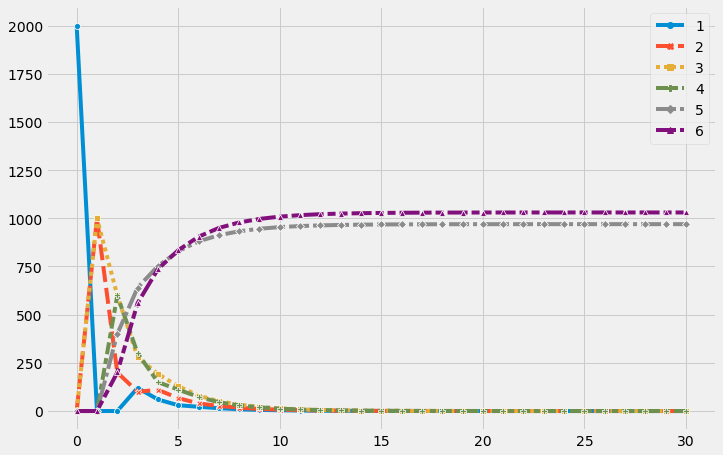

In [0]:
#This Markov Chain has two absorbing states, the two players' selections
#Meaning that once the state is entered, it cannot be left
#Since all states can reach one of them, it is an absorbing Markov Chain, formally:
# p_{ii}=1{\text{ and }}p_{ij}=0{\text{ for }}i\not =j.

#these chains are reducible, not irreducible, meaning one cannot go from any
#state to any other

#Discrete Time Markov Chain
#Markov Property: conditional probability distribution of each step depends
#only on the last step taken
#S = state space
#T = transition space

#It also has 

state = [2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

transition = [
            
            # S    H    T   HH    TT  HT   TH   HHH  TTT  HTT  HHT  THH  HHT  HTH  THT
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], #S
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], #H
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], #T
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], #HH
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], #TT
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], #HT
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], #TH
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], #HHH
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], #TTT
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], #HTT                       
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], #HHT                       
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], #THH                           
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], #HHT                           
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], #HTH                           
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], #THT                           
                            
                            
                            ]

stateHistory = []
stateTrack = [state]
last_state = []
i = 0
length = [0]
convergence = False

while convergence == False and i < 30:
    last_state = state
    state = np.dot(state, transition)
    stateTrack.append(list(state))
    i = i + 1
    length.append(i)
    
    if all(last_state == state) == True:
        convergence = True
        
"""
for s in range(len(stateTrack[0])):
    plt.plot(length, [states[s] for states in stateTrack], label= 'Company %s' %s)
plt.legend()
plt.show()
"""

dims =(10.7, 7.27)
fig, ax = plt.subplots(figsize=dims)
splot = pd.DataFrame(stateTrack, length, ["1", "2", "3", "4", "5", "6"])
sns.lineplot(ax=ax, data = splot, markers=True)
"""
splot = pd.DataFrame(stateTrack, length, ["Company 1", "Company 2", "Company 3"])
ax = sns.lineplot(data=splot,style="event",lw=2, markers=True) 
"""
print('')
print('Converged in', i, 'Iterations')
print('')
print('Steady State Vector: ', state)

In [0]:
import math
# Take the factorial for 1-gram, 2-gram, and 3-gram, and add 2 on to each for homogeneous pairs ('T', 'HH', 'TTT') + 1 for the start node
math.factorial(1) + 2 + math.factorial(2) + 2 + math.factorial(3) + 2

#Or realize that since the options are binary, each n-gram splits into 2 parts except the last, plus 1 start node
#So we get 2 + (2*2) + (2*2*2) + 1 = 15
#Or total nodes = (2^1 + 2^2 + 2^3 + ... 2^n), where n = length of string in PG

permutations = (2**1) + (2**2) + (2**3) + 1

print(permutations)

15
